# Исследование рынка продаж компьютерных игр

В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


# Ход исследования
1. Изучим общую информацию
2. Проведем предобработку данных
3. Проведем исследовательский анализ
4. Проверка гипотез

##  Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
# откроем файл с данными и сохраним его в переменной data
data = pd.read_csv('/datasets/games.csv')
# выведем на экран информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из информации о таблице видим, что встречаются пропуски  данных, тип данных не всегда соответствуут необходимому и логичному, а так же написание заголовков колонок не соответствуют хорошему стилю. 

In [3]:
# выведем на экран 10 первых строк датафрейма
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Предобработка данных

### Стиль заголовков

In [4]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
# проверим изменения, выведем на экран названия столбцов
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Пропуски значений 

In [5]:
# посчитаем пропуски данных
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим пропуски в 'year_of_release', т.к. мы никак не сможем высчитать год выхода игры, а данные пропуски составляют всего 1,6% наших данных. И так как год - целое число, приведем тип данных столбца 'year_of_release' в целые числа.

In [6]:
data = data.dropna(subset = ['year_of_release'])

In [7]:
data['year_of_release'] = data['year_of_release'].astype(int)

Попробуем избавиться от пропусков в строках по столбцу 'genre'.

In [8]:
# рассмотрим все значения в данном столбце
data_genre = data['genre'].sort_values().unique()
data_genre

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [9]:
# рассмотрим строки с пропущенными значениями
data['genre'] = data['genre'].fillna('нет')
data_genre_nan = data.query('genre=="нет"')
data_genre_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,нет,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,нет,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что у пропущенных позиций нет еще и имени, и оценок. Так как пропущенных значений всего 2, да и в других столбцах также есть пропуски, то мы смело можем удалить данные строки. 

In [10]:
data = data.query('genre!="нет"')

Проанализируем данные столбца 'user_score'.

In [11]:
# рассмотрим уникальные значения столбца
data_user_score_unique = data['user_score'].sort_values().unique()
data_user_score_unique

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Из получившихся данных можно заметить странную оценку 'tbd', рассмотрим строки с ней повнимательнее.

In [12]:
data.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Видим, что строк с оценкой 'tbd' достаточно много - 2376, то есть 14,2% от всех данных. 'Tbd' скорей всего означает 'to be done', то есть игроки не определились с оценкой. Для дальнейшей работы можно изменить 'tbd' на 'NaN', т.к. удалять так много данных не целесообразно.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', 'NaN')
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'NaN', nan], dtype=object)

In [14]:
data['user_score'] = data['user_score'].astype(float) # изменим тип данных с текстового на float64
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

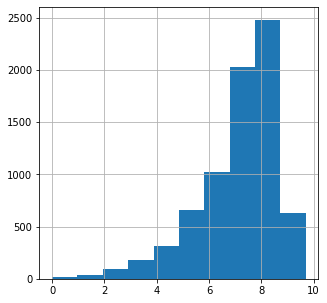

In [15]:
# построим гистограмму
data['user_score'].hist(bins=10, figsize=(5, 5));

На гистограмме видно, что выбросов у нас нет. Медиана и среднее незначительно отличаются (около 5 %). Посмотрим как изменятся данные, если мы заменим пропуски на среднее значение.

In [16]:
# создадим таблицу и заменим в ней заменим пропуски на среднее значение
data1 = data['user_score']
# создадим перемнную, в которую сохраним среднее значение
user_score_mean = data1.mean()
data1 = data1.fillna(user_score_mean)

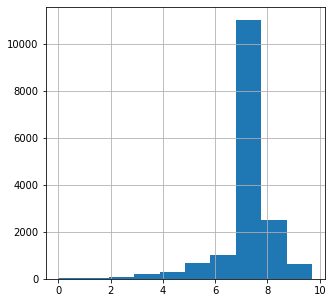

In [17]:
# еще раз построим гистограмму
data1.hist(bins=10, figsize=(5, 5));

In [18]:
# выведем на экран данные по получившемуся столбцу
data1.describe()

count    16444.000000
mean         7.126330
std          1.010109
min          0.000000
25%          7.126330
50%          7.126330
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

Видим, что данные значительно поменялись: среднее, первый квартиль и медиана равны между собой и сильно отличаются от первичного варианта, поэтому стоит оставить пропуски как есть.

Проанализируем данные столбца 'critic_score'.

In [19]:
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

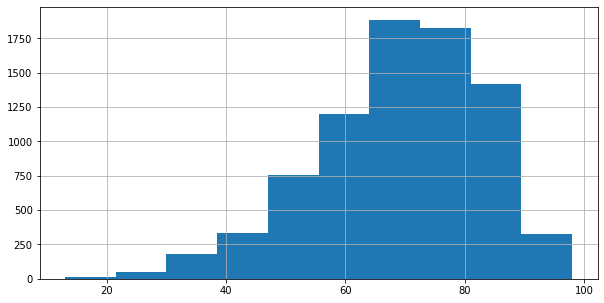

In [20]:
data['critic_score'].hist(bins = 10, figsize=(10, 5));

Видим, что, хотя среднее и медианное значения находятся достаточно близко (медианное на 5% больше среднего), но достаточно высокоe стандартное отклонение (13,9). И так как у нас много пропусков (8578), то замена их на среднее или медианное значение повлечет сильные изменения в наборе данных, исходя из этого, целесообразно оставить пропуски как есть.

Рассмотрим пропуски в столбце 'rating'.

In [21]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Проверим пропуски данных по годам, может быть они появились из-за того, что ESRB (основана в 1994 году) еще не существовало на момент выпуска игры.

In [22]:
# заменим nan на 0
data['rating'] = data['rating'].fillna('without rating')
data_rating_nan = data.query('rating=="without rating"')
# посмотрим в какие годы есть пропуски 
data_rating_nan['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Видим, что пропуски есть не только до 1994 года, но и после.
Посчитаем сколько пропусков после 1994 года.

In [23]:
data_rating_nan_1994 = data_rating_nan.query('year_of_release > 1994')
data_rating_nan_1994['year_of_release'].count()

6195

Всего пропусков в year_of_release было 6766 и из них 6195 позднее 1994 года, т.к. причина пропусков нам не известна, мы не сможем их адекватно заполнить, поэтому оставим данные пропуски как есть.  

### Дубликаты

In [24]:
# посчитаем явные дубликаты в датафрейме
data.duplicated().sum()

0

Явных дубликатов нет. Проверим, есть ли неявные дубликаты.

In [25]:
# посмотрим есть ли неявные дубликаты в жанрах игр
data['genre'].sort_values().unique()


array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Не явных дубликатов в данном столбце нет.

Проверим дубликаты в столбце 'platform'

In [26]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Здесь так же нет дубликатов.

### Добавление столбцов

In [27]:
# добавим столбец и заполним его данными общей суммы продаж игр
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,without rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,without rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,without rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,without rating,28.31


Еще раз выведем информацию по уже исправленному датафрейму.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


***Вывод:***

В процессе предобработки данных:
* были приведены к нижнему регистру названия столбцов;
* изменены типы данных в столбцах для более корректного отображения и дальнейшей работы;
* были удалены строки с отсутствующими годами релизов  и названием игр;
* пропуски в оценках критиков, пользователей и возрастным рейтингом остались без изменений, т.к. нам не известна причина пропусков и мы не сможем ее адекватно заменить.
* Так же мы предположили, что 'tbt' означает 'to be done' (то есть игроки не определились с оценкой) и для дальнейшей работы мы изменили 'tbd' на 'NaN'.

## Исследовательский анализ данных

### Изучим сколько игр выпускалось в разные годы. 

In [30]:
data_year_of_release = data.groupby('year_of_release')['name'].agg('count')
data_year_of_release

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

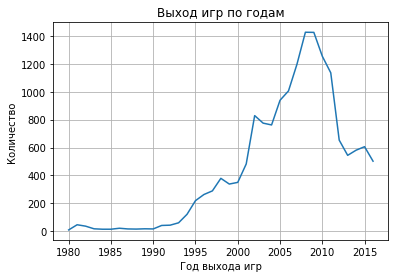

In [31]:
data_year_of_release.plot(y = 'year_of_release', grid=True)
plt.title('Выход игр по годам')
plt.xlabel('Год выхода игр')
plt.ylabel('Количество');

Из полученных данных можно увидеть, что с 1980 по 1993 годы в год выпускалось менее 100 игр, потом с 1994 по 2002 наблюдаем ежегодный рост, с 2003 и в 2004 незначительный спад, а с 2005 и по 2008 снова рост и снова падение с 2010. 

### Посмотрим, как менялись продажи по платформам. Найдем платформы с наибольшими суммарными продажами.

In [32]:
data_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)
data_platform = data_platform.head().reset_index()
data_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


In [33]:
#создадим переменную со значениями платформ
platform_dict = data_platform['platform'].unique()
platform_dict

array(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype=object)

In [34]:
# создадим таблицу, в которую поместим все данные по 5 платформам с самыми большими суммарными продажами
data_sorted = data.query('platform in @platform_dict')

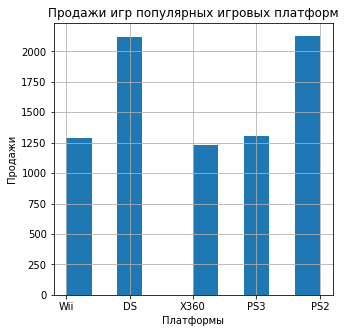

In [35]:
# построим гистограмму с самыми популярными платформами
data_sorted['platform'].hist(bins = 10, figsize=(5, 5), grid=True)
plt.title('Продажи игр популярных игровых платформ')
plt.xlabel('Платформы')
plt.ylabel('Продажи');

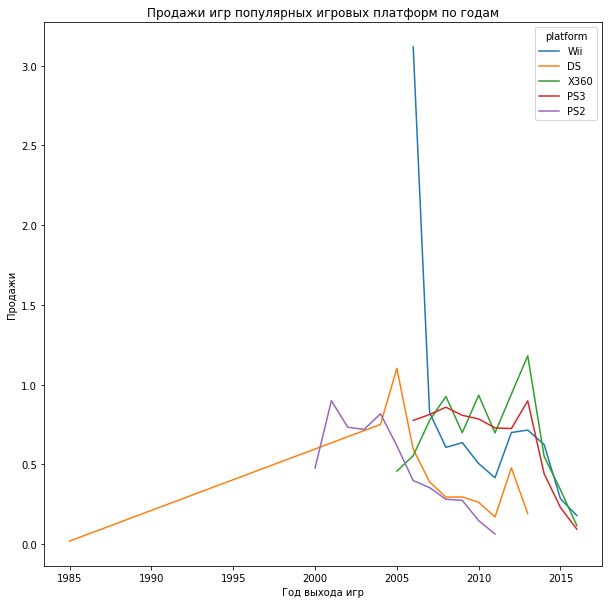

In [36]:
# построим распределение по годам
plt.figure(figsize=(10, 10))
plt.title('Продажи игр популярных игровых платформ по годам')
plt.xlabel('Год выхода игр')
plt.ylabel('Продажи')

sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=data_sorted, ci=None);

Из графика видно, что срок жизни платформы составляет приблизительно 10 лет. Исключение составляюет DS, срок жизни которой начинается в 1985 году и заканчивается в 2013 году.

Рассмотрим данные по платформе DS поближе.

In [37]:
# создадим переменную, куда поместим только игры платформы DS и отсортируем датафрейм по возрастанию года выпуска
data_sorted_DS = data_sorted.query('platform =="DS"').sort_values(by='year_of_release', ascending=True)
data_sorted_DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,without rating,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.00,NaN,NaN,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,without rating,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,NaN,NaN,without rating,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.00,NaN,NaN,without rating,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...
7460,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.00,0.02,NaN,NaN,E,0.21
14716,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,0.00,0.03,0.00,0.00,NaN,NaN,E10+,0.03
7993,The Smurfs 2,DS,2013,Platform,0.00,0.17,0.00,0.01,NaN,NaN,E,0.18
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,without rating,0.51


Видим, что в 1985 году вышла всего 1 игра и больше до 2004 года игр не выпускалось. Если не учитывать игру 1985 года, то данные таблицы подтверждают наше утверждение, что срок жизни платформы составляет примерно 10 лет (DS просуществовала с 2004 по 2013 годы). 

### Определение актуального периода 

Так как нам необходимо выявить закономерности, определяющие успешность игр, то целесообразно брать не весь период наблюдений, а последние 5 лет (с 2012 по 2016 год). В дальнейшем исследовании предыдущие годы учитывать не будем.

In [38]:
# сохраним данные за выбранный период в новом датафрейме
actual_data = data.query('year_of_release >=2012')
actual_data.info()# посмотрим информацию о новом датафрейме 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


In [39]:
new_percent = len(actual_data)/len(data)
percentage = f"{new_percent:.0%}"
print("Актуальные данные состаляют:", percentage, "от начальных данных") 

Актуальные данные состаляют: 18% от начальных данных


### Рассмотрим какие платформы лидируют по продажам за актуальный период 5 лет.

In [40]:
actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [41]:
# для анализа популярности игровых платформ, выберем 5 самый продаваемых
actual_data_top_5 = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False).head().reset_index()
actual_data_top_5

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


In [42]:
#создадим переменную со значениями платформ
platform_dict1 = actual_data_top_5['platform'].unique()

In [43]:
# создадим таблицу, в которую поместим все данные по 5 платформам с самыми большими суммарными продажами
data_sorted_top_5 = actual_data.query('platform in @platform_dict1')

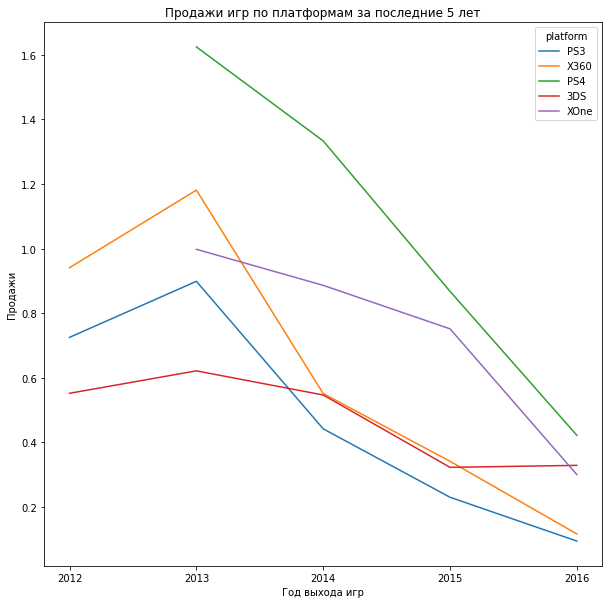

In [44]:
# построим график по популярным платформам
plt.figure(figsize=(10, 10))
plt.title('Продажи игр по платформам за последние 5 лет')
plt.xlabel('Год выхода игр')
plt.ylabel('Продажи')
plt.xticks([2012, 2013, 2014, 2015, 2016])
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=data_sorted_top_5, ci=None);


По графику видно, что практически у всех платформ идет спад в продаже игр с 2013 года, исключение составляет только 3DS, у которой отмечается рост с 2015 года.

### Построим ящик с усами по игровым платформам.

Построим диаграмму размаха сначала в полном виде чтобы посмотреть на выбросы.

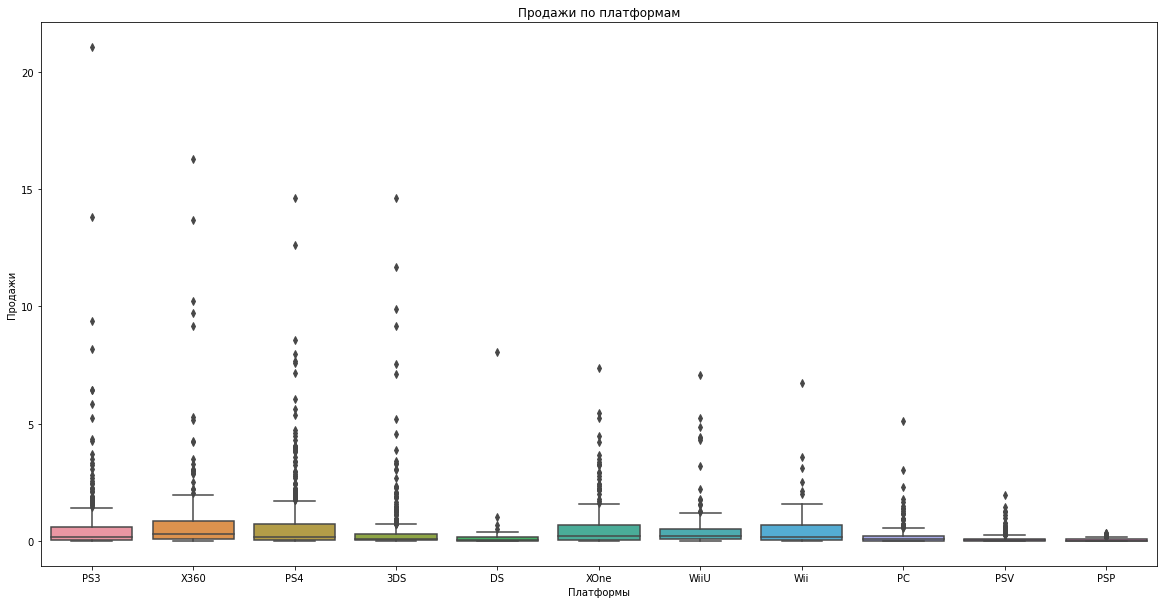

In [45]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'platform',y='total_sales', data=actual_data)
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи');

По получившейся диаграмме размаха, видно большое количество выбросов. Для более подроробного изучения данных, изменим маштаб.

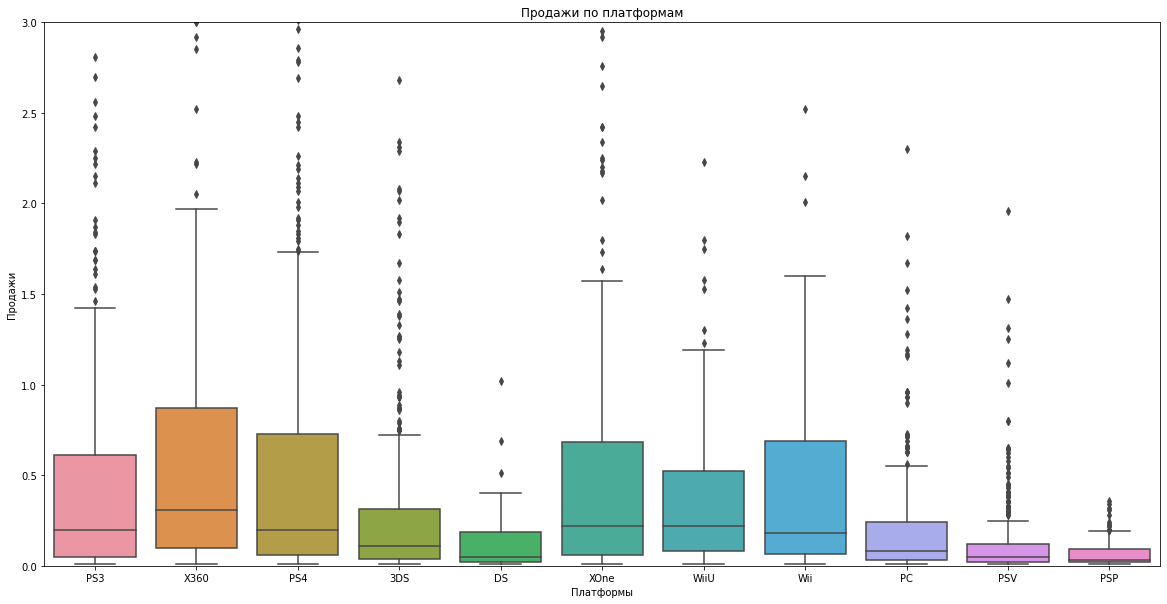

In [46]:
plt.figure(figsize=(20, 10))
plt.ylim(0, 3)
sns.boxplot(x = 'platform',y='total_sales', data=actual_data)
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи');

In [47]:
actual_data['total_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

Из ящика с усами видим, что у каждой платформы есть достаточно много выбросов. Медианное значение по платформам не совпадает, но не сильно отличаются друг от друга, самое большое медианное значение у X360.

### Рассмотрим, как влияют на продажи внутри  платформы отзывы пользователей и критиков.

Изучим PS4, как самую популярную платформу из нашего датафрейма.

In [48]:
# сохраним данные об играх PS4 в отдельном датафрейме
data_PS4 = data_sorted_top_5.query('platform=="PS4"')
data_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,without rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


0.40656790206178095

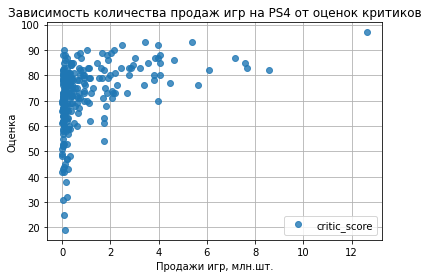

In [49]:
# построим диаграмму рассеяния PS4  и посчитаем коэффициент корреляции Пирсона по оценкам критиков
data_PS4.plot(x= 'total_sales', y='critic_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на PS4 от оценок критиков')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_PS4['critic_score'].corr(data_PS4['total_sales'])

Видим, что корреляция умеренная и равна 0,41, поэтому можно сделать вывод,что зависимость продажи игр от оценок критиков существует. 

-0.031957110204556376

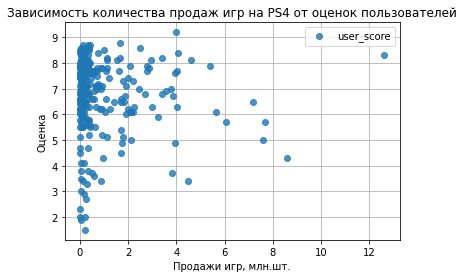

In [50]:
# построим диаграмму рассеяния PS4  и посчитаем коэффициент корреляции Пирсона по оценкам пользователей
data_PS4.plot(x= 'total_sales', y='user_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на PS4 от оценок пользователей')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_PS4['user_score'].corr(data_PS4['total_sales'])

В данном случае корреляция обратная и совсем незначительная -0,032, что говорит о том, что оценки пользователей не влияют на продажу игр.

Проверим наши выводы на других платформах.<p> 

In [51]:
# сделаем срез данных по платформе
data_PS3 = data_sorted_top_5.query('platform=="PS3"')

0.3314972592629587

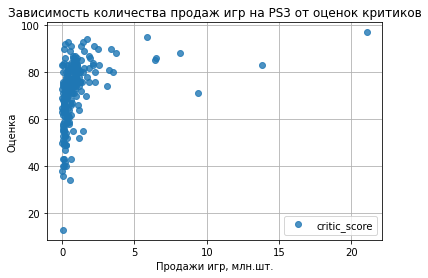

In [52]:
# построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона по оценкам критиков
data_PS3.plot(x= 'total_sales', y='critic_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на PS3 от оценок критиков')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_PS3['critic_score'].corr(data_PS3['total_sales'])

Коэффициент корреляции равен 0,33, что говорит об умеренной зависимости продаж игр от отзывов критиков.

-0.005143522887113828

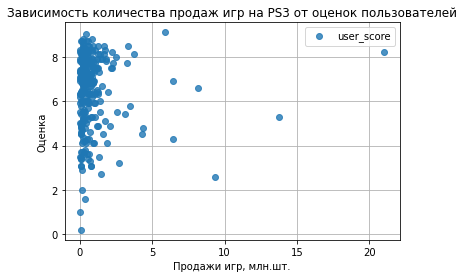

In [53]:
# построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона по оценкам пользователей
data_PS3.plot(x= 'total_sales', y='user_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на PS3 от оценок пользователей')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_PS3['user_score'].corr(data_PS3['total_sales'])

Здесь мы так же как и в анализе PS4 по оценкам потребителей, не видим зависимости продаж от оценок потребителей.

Рассмотрим X360.

0.3605734888507336

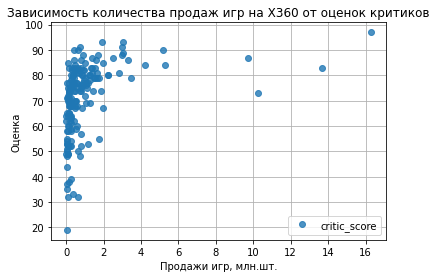

In [54]:
# сделаем срез данных по платформе
data_X360 = data_sorted_top_5.query('platform=="X360"')
# построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона по оценкам критиков
data_X360.plot(x= 'total_sales', y='critic_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на X360 от оценок критиков')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_X360['critic_score'].corr(data_X360['total_sales'])

0.006163978646213326

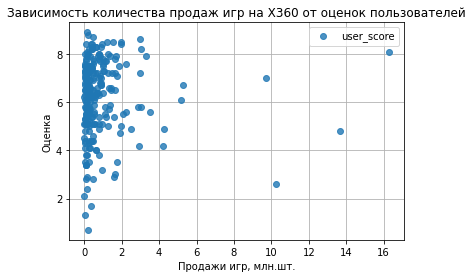

In [55]:
# построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона по оценкам пользователей
data_X360.plot(x= 'total_sales', y='user_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на X360 от оценок пользователей')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_X360['user_score'].corr(data_X360['total_sales'])

По платформе X360 мы видим так же умеренную зависимость продаж игр от оценки критиков (0,36) и отсутствие зависимости от оценки пользователей (0,01).

 Рассмотрим платформу 3DS.

0.3208028695360785

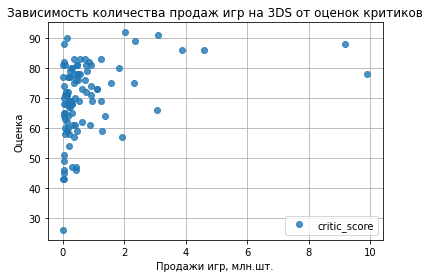

In [56]:
# сделаем срез данных по платформе
data_3DS = data_sorted_top_5.query('platform=="3DS"')
# построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона по оценкам критиков
data_3DS.plot(x= 'total_sales', y='critic_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на 3DS от оценок критиков')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_3DS['critic_score'].corr(data_3DS['total_sales'])

0.19758263411038599

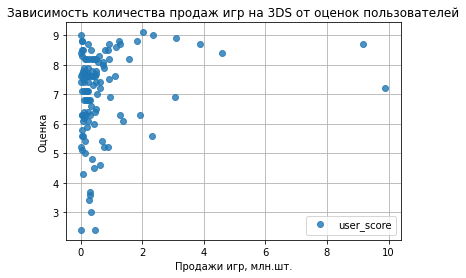

In [57]:
# построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона по оценкам пользователей
data_3DS.plot(x= 'total_sales', y='user_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на 3DS от оценок пользователей')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_3DS['user_score'].corr(data_3DS['total_sales'])

По платформе 3DS мы видим так же, как и в предыдущих случаях, умеренную зависимость продаж игр от оценок критиков (0,32), но зависимость продаж от оценок пользователей уже появляется, хотя она все еще и слабая (0,2).

Проверим последнюю платформу XOne.

0.4169983280084017

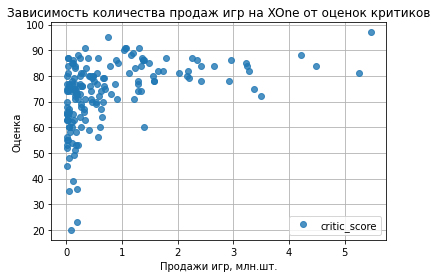

In [58]:
# сделаем срез данных по платформе
data_XOne = data_sorted_top_5.query('platform=="XOne"')
# построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона по оценкам критиков
data_XOne.plot(x= 'total_sales', y='critic_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на XOne от оценок критиков')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_XOne['critic_score'].corr(data_XOne['total_sales'])

-0.06892505328279414

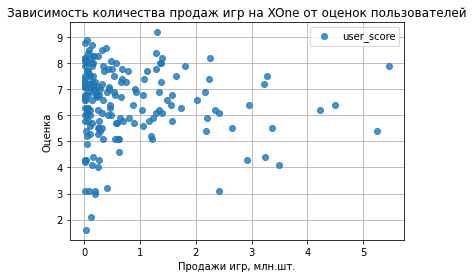

In [59]:
# построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона по оценкам пользователей
data_XOne.plot(x= 'total_sales', y='user_score', style='o', alpha=0.8, grid=True)
plt.title('Зависимость количества продаж игр на XOne от оценок пользователей')
plt.xlabel('Продажи игр, млн.шт.')
plt.ylabel('Оценка');
data_XOne['user_score'].corr(data_XOne['total_sales'])

Анализ по платформе XOne так же подтвердил наш первый вывод, что существует умеренная зависимость роста продаж от оценок критиков и не существует (или в случае с 3DS существует, но слабая) зависимости от оценок пользователей. 

Сравним оценки критиков и пользователей на разных платформах. Для этого рассчитаем стандартное отклонение, среднюю, медиану и дисперсию оценок критиков и пользователей.

In [60]:
# Данные по оценкам критиков
top_5 = list(data_sorted_top_5['platform'].sort_values().unique())
for i in top_5:
    print('Медиана', i, data_sorted_top_5[data_sorted_top_5['platform']==i]['critic_score'].median())
    print('Среднее', i, data_sorted_top_5[data_sorted_top_5['platform']==i]['critic_score'].mean())
    print('Дисперсия', i, np.var(data_sorted_top_5[data_sorted_top_5['platform']==i]['critic_score']))
    print('Стандартное отклонение', i, np.std(data_sorted_top_5[data_sorted_top_5['platform']==i]['critic_score']))
    print('\n')

Медиана 3DS 71.0
Среднее 3DS 69.8173076923077
Дисперсия 3DS 143.4377773668639
Стандартное отклонение 3DS 11.976551146589067


Медиана PS3 74.0
Среднее PS3 71.56542056074767
Дисперсия PS3 177.4606734212595
Стандартное отклонение PS3 13.321436612515164


Медиана PS4 73.0
Среднее PS4 72.09126984126983
Дисперсия PS4 155.28135235575712
Стандартное отклонение PS4 12.46119385756265


Медиана X360 74.0
Среднее X360 70.87134502923976
Дисперсия X360 200.28754146575014
Стандартное отклонение X360 14.152298098392011


Медиана XOne 76.0
Среднее XOne 73.32544378698225
Дисперсия XOne 166.7994117853016
Стандартное отклонение XOne 12.915084660400085




Медиана оценок критиков по 5 популярным платформам незначительно отличаются друг от друга (от 3 до 7%) так же как и среднее (от 2 до 5%). Дисперсия отличается уже более значительно (от 11 до 22%).

In [61]:
# Данные по оценкам пользователей
for i in top_5:
    print('Медиана', i, data_sorted_top_5[data_sorted_top_5['platform']==i]['user_score'].median())
    print('Среднее', i, data_sorted_top_5[data_sorted_top_5['platform']==i]['user_score'].mean())
    print('Дисперсия', i, np.var(data_sorted_top_5[data_sorted_top_5['platform']==i]['user_score']))
    print('Стандартное отклонение', i, np.std(data_sorted_top_5[data_sorted_top_5['platform']==i]['user_score']))
    print('\n')

Медиана 3DS 7.4
Среднее 3DS 7.033333333333333
Дисперсия 3DS 2.1778362573099415
Стандартное отклонение 3DS 1.475749388382032


Медиана PS3 7.0
Среднее PS3 6.53286219081272
Дисперсия PS3 2.7077893343655184
Стандартное отклонение PS3 1.6455361844594967


Медиана PS4 7.0
Среднее PS4 6.748249027237354
Дисперсия PS4 2.121796544989326
Стандартное отклонение PS4 1.4566387832916319


Медиана X360 6.5
Среднее X360 6.220851063829787
Дисперсия X360 2.482075871435039
Стандартное отклонение X360 1.5754605267778177


Медиана XOne 6.8
Среднее XOne 6.521428571428572
Дисперсия XOne 1.8965188383045526
Стандартное отклонение XOne 1.377141546212499




Медиана оценок пользователей по игровым платформам более разнообразна и отличается от 5 до 11%, чуть большее различие в среднем значении - от 4 до 12%.

### Рассмотрим общее распределение игр по жанрам. 

In [62]:
data_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)
data_genre['percentage_of_total'] = round(data_genre['total_sales']/data_genre['total_sales'].sum()*100, 2)
data_genre

,total_sales,percentage_of_total
genre,,
Action,441.12,30.50
Shooter,304.73,21.07
Role-Playing,192.80,13.33
Sports,181.07,12.52
Misc,85.04,5.88
Platform,61.00,4.22
Racing,53.50,3.70
Fighting,44.49,3.08
Simulation,35.12,2.43


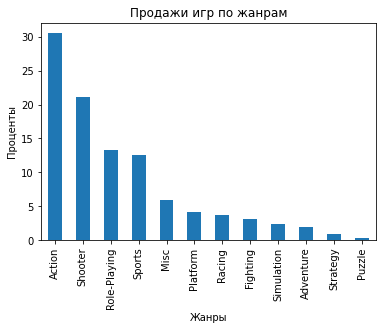

In [63]:
data_genre.plot(y='percentage_of_total', kind='bar', legend=None)
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Проценты');

Из полученных данных видно, что самым популярным жанром является Action	(30.5%), на втором месте Shooter (21.07%), самым плохопродаваемым жанром является Puzzle - всего 0.34%. 

Проверим получившийся вывод, построя диаграмму размаха.

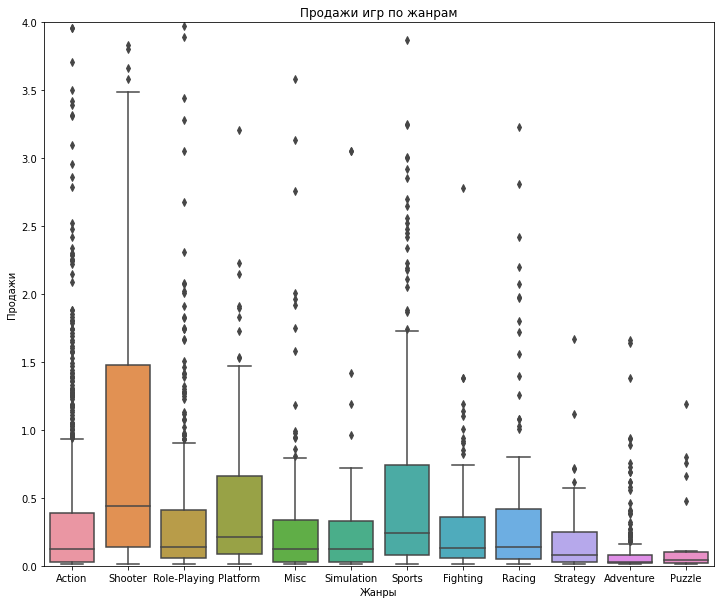

In [64]:
# построим диаграммы размаха и сравним медианные продажи по платформам
plt.figure(figsize=(12, 10))
plt.ylim(0, 4)
sns.boxplot(data = actual_data, x='genre', y='total_sales')
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи');

Здесь уже получается, что самое большое медианное значение у игр в жанре Shooter (корорый в предыдущем исследовании занял 2-е место), жанр Action на уровне Role-Playing, Misc, Simulation и др. При этом так же изменилась и самая плохопродаваемый жанр - теперь это Adventure, а Puzzle	уже предпоследний.

***Вывод:***

При проведении исследовательского анализа данных выяснилось, что:
* до 1993 года в год выпускалось менее 100 игр, а с 1994 по 2002 наблюдаем ежегодный рост с незначительным падением в 2003-2004 гг., далее снова рост вплоть до 2010 года (в 2008 и 2009 годах максимальное количество релизов - 1427 и 1426 соответственно);
* срок жизни платформы составляет примерно 10 лет;
* самая популярная игровая платформа PS4; 
* практически у всех платформ идет спад в продаже игр с 2013 года, исключение составляет только 3DS, у которой отмечается рост с 2015 года;
* по ящику с усами можно заметить, что у каждой платформы есть достаточно много выбросов, медианное значение по платформам не совпадает, но не сильно отличаются друг от друга (самое большое медианное значение у X360).
* существует умеренная зависимость роста продаж от оценок критиков и не существует (или существует но очень слабая) зависимости от оценок пользователей;
* самым популярным жанром является Shooter, а самым плохопродаваемым Adventure.

    

## Составим портрет пользователя каждого региона

### Определим для пользователей каждого региона самые популярные платформы.

In [65]:
# найдем топ-5 самых популярных платформ в Северной Америке
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


In [66]:
# поместим данные, не вошедшие в Топ-5 в отдельную категорию 'others'
list_others = ['WiiU', 'PC','Wii', 'PSV', 'DS','PSP']
actual_data_na = actual_data.copy()
for i in list_others:
    actual_data_na.loc[actual_data_na['platform'] == i, 'platform'] = "others"

In [67]:
data_platform_NA = actual_data_na.pivot_table(index='platform', values= 'na_sales',aggfunc='sum').\
sort_values(by='na_sales', ascending=False)
data_platform_NA

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
others,90.37
3DS,55.31


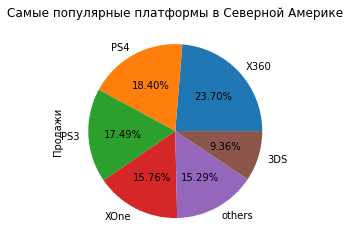

In [68]:
# построим круговую диаграмму
data_platform_NA.plot(y='na_sales', kind='pie', autopct='%1.2f%%', legend=None)
plt.title('Самые популярные платформы в Северной Америке')
plt.ylabel('Продажи');

In [69]:
# рассмтрим данные по Европе
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


In [70]:
# поместим данные, не вошедшие в Топ-5 в отдельную категорию 'others'
list_others_eu = ['WiiU', 'PC','Wii', 'PSV', 'DS','PSP']
actual_data_eu = actual_data.copy()
for i in list_others_eu:
    actual_data_eu.loc[actual_data_eu['platform'] == i, 'platform'] = "others"

In [71]:
data_platform_EU = actual_data_eu.pivot_table(index='platform', values= 'eu_sales',aggfunc='sum').\
sort_values(by='eu_sales', ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,106.86
others,90.12
X360,74.52
XOne,51.59
3DS,42.64


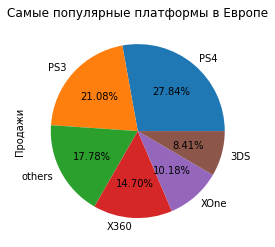

In [72]:
# построим круговую диаграмму
data_platform_EU.plot(y='eu_sales', kind='pie', autopct='%1.2f%%', legend=None)
plt.title('Самые популярные платформы в Европе')
plt.ylabel('Продажи');
data_platform_EU

In [73]:
# посмотрим данные по Японии
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


In [74]:
# поместим данные, не вошедшие в Топ-5 в отдельную категорию 'others'
list_others_jp = ['X360', 'PC','Wii', 'XOne', 'DS','PSP']
actual_data_jp = actual_data.copy()
for i in list_others_jp:
    actual_data_jp.loc[actual_data_jp['platform'] == i, 'platform'] = "others"
data_platform_JP = actual_data_jp.pivot_table(index='platform', values= 'jp_sales',aggfunc='sum').\
sort_values(by='jp_sales', ascending=False)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
others,19.49
PS4,15.96
WiiU,13.01


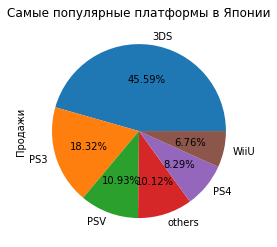

In [75]:
# построим круговую диаграмму
data_platform_JP.plot(y='jp_sales', kind='pie', autopct='%1.2f%%', legend=None)
plt.title('Самые популярные платформы в Японии')
plt.ylabel('Продажи');
data_platform_JP

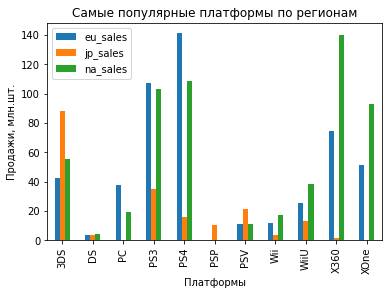

In [76]:
# сравним продажи по платформам в трех регионах
data_region = actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'] , aggfunc='sum').\
plot(kind='bar')
plt.title('Самые популярные платформы по регионам')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн.шт.');

Из полученных данных видно, что вкусы пользователей регионов, в отношении популярности платформ, сильно различаются. В Северной Америке самая популярная платформа - X360 (23.7%), в Европе она занимает 4 место по популярности (14.7%), а в Японии данная платформа вообще не попала в топ 5; самая популярная платформа в Европе -  PS4 (27.84%), в Северной Америке она занимает 2 место(18.4%), а в Японии 5 (8.29%); самая популярная в Японии платформа - 3DS (45.59%), в Северной Америке и в Европе она занимает 6 место (9.36% и 8.41% соответственно).

### Определим для пользователей каждого региона самые популярные жанры игр.

In [77]:
# Северная Америка
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


,na_sales
genre,
Action,177.84
Shooter,144.77
others,84.64
Sports,81.53
Role-Playing,64.00
Misc,38.19


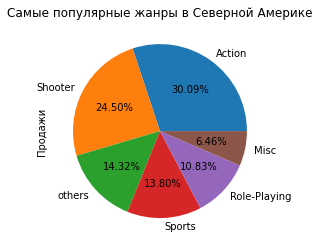

In [78]:
# заменим жанры, не вошедшие в ТОП-5 на others
list_others_genre_na = ['Platform', 'Fighting','Racing', 'Adventure', 'Simulation', 'Strategy', 'Puzzle']
data_genre_na = actual_data.copy()
for i in list_others_genre_na:
    data_genre_na.loc[data_genre_na['genre'] == i, 'genre'] = "others"
data_genre_NA = data_genre_na.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False)

data_genre_NA.plot(y='na_sales', kind='pie', autopct='%1.2f%%', legend=None)
plt.title('Самые популярные жанры в Северной Америке')
plt.ylabel('Продажи');

data_genre_NA

In [79]:
# Европа
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


,eu_sales
genre,
Action,159.34
Shooter,113.47
others,89.10
Sports,69.09
Role-Playing,48.53
Racing,27.29


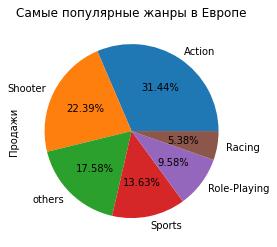

In [80]:
list_others_genre_eu = ['Platform', 'Fighting','Misc', 'Adventure', 'Simulation', 'Strategy', 'Puzzle']
data_genre_eu = actual_data.copy()
for i in list_others_genre_eu:
    data_genre_eu.loc[data_genre_eu['genre'] == i, 'genre'] = "others"

data_genre_EU = data_genre_eu.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False)

data_genre_EU.plot(y='eu_sales', kind='pie', autopct='%1.2f%%', legend=None)
plt.title('Самые популярные жанры в Европе')
plt.ylabel('Продажи');

data_genre_EU

In [81]:
# Япония
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


,jp_sales
genre,
Role-Playing,65.44
Action,52.80
others,41.63
Misc,12.86
Simulation,10.41
Fighting,9.44


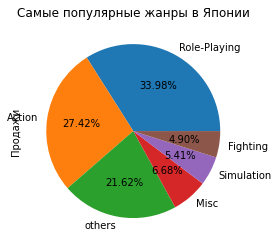

In [82]:
list_others_genre_jp = ['Platform', 'Racing','Shooter', 'Adventure', 'Sports', 'Strategy', 'Puzzle']
data_genre_jp = actual_data.copy()
for i in list_others_genre_jp:
    data_genre_jp.loc[data_genre_jp['genre'] == i, 'genre'] = "others"

data_genre_JP = data_genre_jp.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False)

data_genre_JP.plot(y='jp_sales', kind='pie', autopct='%1.2f%%', legend=None)
plt.title('Самые популярные жанры в Японии')
plt.ylabel('Продажи');

data_genre_JP

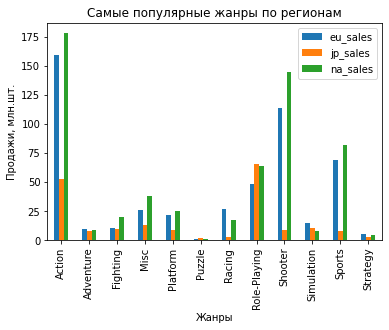

In [83]:
# сравним продажи по жанрам в трех регионах
data_region = actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'] , aggfunc='sum').\
plot(kind='bar')
plt.title('Самые популярные жанры по регионам')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн.шт.');

Здесь уже нет такого разнообразия как в предпочтениях игровых платформ: в Северной Америке и Европе самый популярный жанр -  Action (30.09% и 31.44% соответственно), а в Японии он занимает 2 место (27.42%); самым популярный жанр игр в Японии является Role-Playing (33.98%), который занимает 5 место в Северной Америке и Европе (10.83% и 9.58% соответственно). Можно также отметить, что жанровые предпочтения в Северной Америке и Европе похожи.

### Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [84]:
# создадим таблицу с возрастным рейтингом по регионам
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
actual_data_rating_region = actual_data.groupby('rating')[sales].sum().sort_values(by='na_sales', ascending=False)
actual_data_rating_region

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
M,231.57,193.96,21.20,63.38
E,114.37,113.03,28.33,31.44
without rating,103.31,91.50,108.84,27.17
E10+,75.70,55.37,8.19,16.23
T,66.02,52.96,26.02,17.94


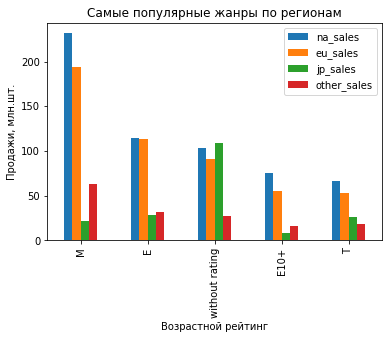

In [85]:
actual_data_rating_region.plot(kind='bar')
plt.title('Самые популярные жанры по регионам')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Продажи, млн.шт.');

Изучив данные по возрастному рейтенгу, можно отметить, что возрастной рейтинг в Северной Америке, Европе и в прочих странах совпадает (первое и второй место по популярности - игры с рейтенгом М (для людей старше 17 лет) и Е (для всех возрастов) соответственно), при этом в Японии уже другая картина: самые продаваемые игры с неизвестным рейтингом (without rating), на втором месте с рейтингом Е.

***Вывод:***

Подводя итог, можно сказать, что:
* вкусы пользователей в отношении популярности платформ сильно различаются. В Северной Америке самая популярная платформа - X360 (23.7%), в Европе -  PS4 (27.84%), а в Японии платформа - 3DS (45,59%);
* в Северной Америке и Европе самый популярный жанр -  Action (30.09% и 31.44% соответственно) и жанровые предпочтения в данных регионах похожи, а в Японии самым популярным жанром игр является Role-Playing (33.98%);
* самый популярный возрастной рейтинг в Северной Америке и Европе - М (игры для людей старше 17 лет), а в Японии на первом месте игры с неизвестным рейтингом, на втором, с большим отрывом, с рейтингом Е (для всех пользователей). 


## Проверка гипотез

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Так как ***нулевая гипотеза*** формируется, так чтобы использовалось равенство, то в данном случае сформулируем ее так: ***средние пользовательские рейтинги платформ Xbox One и PC равны***.

Тогда ***альтернативная гипотеза***  будет - ***средние пользовательские рейтинги платформ Xbox One и PC не равны***.

Наша гипотеза двусторонняя, так как на нулевую гипотезу можно ответить только "да" или "нет".<p>
Так как у нас достаточно большая выборка (2886 строк), поэтому критический уровень статистической значимости примем на уровне 0.01.

In [86]:
# сохраним в переменной данные по Xbox One и посчитаем средний пользовательский рейтинг
reting_XOne = actual_data[actual_data['platform']=="XOne"]['user_score']
reting_XOne.mean()

6.521428571428572

In [88]:
# сохраним в переменной данные по РС и посчитаем средний пользовательский рейтинг
reting_PC = actual_data[actual_data['platform']=="PC"]['user_score']
reting_PC.mean()

6.428640776699029

In [89]:
# проверим гипотезу
alpha = .01
results = st.ttest_ind(reting_XOne, reting_PC, nan_policy='omit')
print('р-значение:', results.pvalue)

р-значение: 0.5535080500643738


In [90]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


***Вывод:*** Не получилось отвергнуть гипотезу о равенстве пользовательских рейтингов платформ Xbox One и PC. И так как р-значение равно 0.554, то можно утверждать, что, с достаточно большой вероятностью, средние значения оценок пользователей Xbox One и PC будут равны. 
    

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports  разные.

Так как нулевую гипотезу формулируют с равенством, то в данном случае ***нулевая гипотеза*** - ***Средние пользовательские рейтинги жанров Action и Sports равны***. 

Противоположная нулевой - ***альтернативная гипотеза*** - ***Средние пользовательские рейтинги жанров Action и Sports разные***. 

Критический уровень статистической значимости примем на уровне 0.01, как и  при проверке предыдущей гипотезы.

In [91]:
# создадим переменную с пользовательским рейтингом игр жанра Action и посчитаем ее среднюю
rating_Action = actual_data[actual_data['genre']=="Action"]['user_score']
rating_Action.mean()

6.825047801147227

In [92]:
# создадим переменную с пользовательским рейтингом игр жанра Sports и посчитаем ее среднюю
rating_Sports = actual_data[actual_data['genre']=="Sports"]['user_score']
rating_Sports.mean()

5.455897435897437

In [93]:
# проверим гипотезу
alpha = .01
results = st.ttest_ind(rating_Action, rating_Sports, nan_policy='omit')
print('р-значение:', results.pvalue)

р-значение: 3.7163089460934874e-26


In [94]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


***Вывод:*** Мы отвергли нулевую гипотезу и это означает, что очень маленький шанс получить равные оценки пользователей игр жанров Action и Sports.

## Общий вывод 

***При проведении исследовательского анализа данных выяснилось, что:***
* до 1993 года в год выпускалось менее 100 игр, а с 1994 по 2002 наблюдаем ежегодный рост с незначительным падением в 2003-2004 гг., далее снова рост вплоть до 2010 года (в 2008 и 2009 годах максимальное количество релизов - 1427 и 1426 соответственно);
* срок жизни платформы составляет примерно 10 лет;
* самая популярная игровая платформа PS4; 
* практически у всех платформ идет спад в продаже игр с 2013 года, исключение составляет только 3DS, у которой отмечается рост с 2015 года;
* актуальный период для дальнейшего анализа - 5 лет, все дальнейшие исследования велись по данным за период с 2012 по 2016 гг.;
* при построении "ящика с усами", можно заметить, что среднее значение по платформам не совпадает, но достаточно близко, самое большое медианное значение у X360;
* существует умеренная зависимость роста продаж от оценок критиков и не существует (если не считать слабую зависимость по платформе 3DS) зависимости от оценок пользователей;
* самым популярным жанром является Shooter, а самым плохопродаваемым Adventure.

***Изучив потребителей разных регионов, можно отметить:***
* вкусы пользователей в отношении популярности платформ сильно различаются. В Северной Америке самая популярная платформа - X360 (23.7%), в Европе -  PS4 (27.84%), а в Японии платформа - 3DS (45,59%);
* в Северной Америке и Европе самый популярный жанр -  Action (30.09% и 31.44% соответственно) и жанровые предпочтения в данных регионах очень похожи, а в Японии самым популярным жанром игр является Role-Playing (33.98%);
* самый популярный возрастной рейтинг в Северной Америке и Европе - М (игры для людей старше 17 лет), а в Японии на первом месте игры с неизвестным рейтингом, на втором, с большим отрывом, с рейтингом Е (для всех пользователей).

***Проверив гипотезы можно сказать, что:***
*  с достаточно большой вероятностью, средние значения оценок пользователей Xbox One и PC будут равны.
*  очень маленький шанс получить равные оценки пользователей игр жанров Action и Sports.

***Итоговый вывод:***

При прогнозе рекламного бюджета на следующий год можно сделать ставку на игры жанров Action (т.к. они популярны и Северной Америке и в Европе, а так же на втором по популярности месте в Японии) и Shooter (который показал хороший результат по глобальным продажам, а так же занимает 2 место по популярности в Европе и Северной америке). Для релиза можно выбрать платформы Х360 (у нее самое большое значение медианного значения, а так же данная платформа самая популярная в Северной Америке) и PS4 (самую популярную платформу в Европе). При выборе возрастного рейтинга лучше отдать предпочтение рейтингу М (для людей старше 17 лет). Стоит так же обратить внимание на оценки критиков, которые умеренно влияют на объемы продаж игр.